In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/kaggle/earthquake_1995-2023.csv')

In [ ]:
#Which year experienced the most intense earthquakes and which places were affected?
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [ ]:
df['date_time']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [ ]:
#adding a new column of year from the date_time attribute
df['year'] = pd.to_datetime(df['date_time']).dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
 19  year       1000 non-null   int64  
dtypes: float6

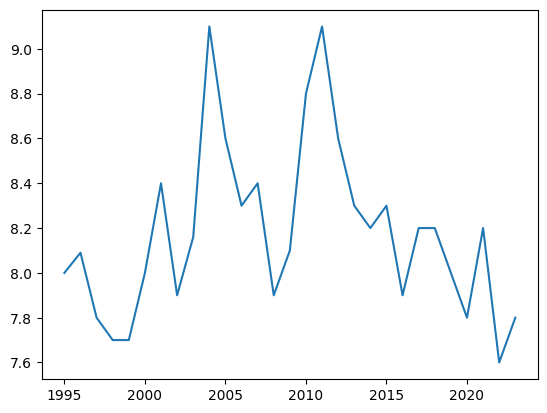

In [ ]:
#plotting a graph for relationship between max intensity and year
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(df.groupby('year')['magnitude'].max())
plt.show()

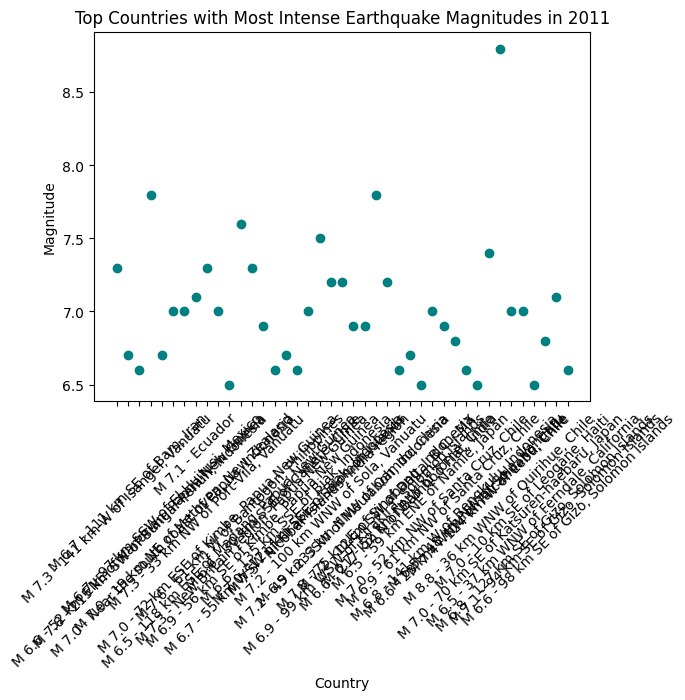

In [ ]:
#which place had max intensity - lowest 10 and highest 10

df['country_new'] = df['title'].str.split(',').str[1]

df_2011 = df[df['year'] == 2010]
max_magnitude_row = df_2011[df_2011['magnitude'] == df_2011['magnitude'].max()]

# Extract the country with the most intense magnitude in 2011
most_intense_country = max_magnitude_row['country_new'].values[0]

# Create a bar chart
plt.scatter(df_2011['title'], df_2011['magnitude'], color='teal')
plt.title('Top Countries with Most Intense Earthquake Magnitudes in 2011')
plt.xlabel('Country')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.groupby('country')['magnitude'].max()

country
Afghanistan                                                   7.5
Algeria                                                       6.8
Antarctica                                                    7.1
Argentina                                                     7.2
Azerbaijan                                                    6.8
Bolivia                                                       6.8
Botswana                                                      6.5
Brazil                                                        6.8
Canada                                                        7.8
Chile                                                         8.8
Colombia                                                      7.3
Costa Rica                                                    7.6
Ecuador                                                       7.8
El Salvador                                                   6.6
Fiji                                                          8.2
Gr

In [ ]:
# time of day and tsunami
df['time'] = pd.to_datetime(df['date_time']).dt.time
df_relationship = df


In [ ]:

df_manipulation = df
def timeofday(time):
  hour = time.hour
  if 6 <= hour < 12:
    return 'Morning'
  elif 12 <= hour < 18:
    return 'Afternoon'
  elif 18 <= hour < 24:
    return 'Evening'
  else:
    return 'Midnight'
df_manipulation['time'] = pd.to_datetime(df_manipulation['time'], format='%H:%M:%S')
df_manipulation['value'] = df_manipulation['time'].apply(timeofday)
df_manipulation

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,...,magType,depth,latitude,longitude,location,continent,country,year,time,value
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,...,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu,2023,1900-01-01 12:47:00,Afternoon
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,...,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN,2023,1900-01-01 00:22:00,Midnight
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,...,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina,2023,1900-01-01 03:05:00,Midnight
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,...,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN,2023,1900-01-01 06:48:00,Morning
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,...,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN,2023,1900-01-01 06:48:00,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"M 7.1 - 85 km S of Tungor, Russia",7.1,27-05-1995 13:03,0,9,NaN,0,776,us,0,...,mwb,11.000,52.6290,142.8270,"Tungor, Russia",Asia,Russia,1995,1900-01-01 13:03:00,Afternoon
996,"M 7.7 - 249 km E of Vao, New Caledonia",7.7,16-05-1995 20:12,0,4,NaN,0,912,us,0,...,mw,20.200,-23.0080,169.9000,"Vao, New Caledonia",NaN,NaN,1995,1900-01-01 20:12:00,Evening
997,"M 6.9 - 27 km NNW of Maubara, Timor Leste",6.9,14-05-1995 11:33,0,6,NaN,0,732,us,0,...,mw,11.200,-8.3780,125.1270,"Maubara, Timor Leste",NaN,Indonesia,1995,1900-01-01 11:33:00,Morning
998,"M 6.6 - 10 km W of Aianí, Greece",6.6,13-05-1995 08:47,0,9,NaN,0,670,us,0,...,mw,14.000,40.1490,21.6950,"Aianí, Greece",Europe,Greece,1995,1900-01-01 08:47:00,Morning


In [ ]:
filtered_df = df_manipulation[df_manipulation['tsunami'] == 1]
result = filtered_df.groupby('value')['tsunami'].sum().reset_index()
result = pd.DataFrame(result)
result

,value,tsunami
0,Afternoon,73
1,Evening,93
2,Midnight,74
3,Morning,85


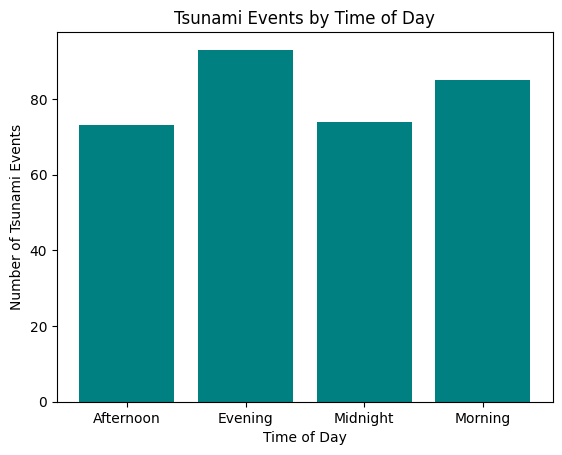

In [ ]:
plt.bar(result['value'], result['tsunami'], color='teal')
plt.title('Tsunami Events by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Tsunami Events')

plt.show()

In [ ]:
df.groupby('year')['magnitude'].max()

year
1995    8.00
1996    8.09
1997    7.80
1998    7.70
1999    7.70
2000    8.00
2001    8.40
2002    7.90
2003    8.16
2004    9.10
2005    8.60
2006    8.30
2007    8.40
2008    7.90
2009    8.10
2010    8.80
2011    9.10
2012    8.60
2013    8.30
2014    8.20
2015    8.30
2016    7.90
2017    8.20
2018    8.20
2019    8.00
2020    7.80
2021    8.20
2022    7.60
2023    7.80
Name: magnitude, dtype: float64